In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.stats.stats import pearsonr

In [2]:
log2rpkm = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/gnvae/input/select_samples/_m/log2rpkm.csv', index_col=0).transpose()
log2rpkm.head()

chr11:113412884-113415420(-)  chr11:113414462-113415420(-)  \
R12864                      2.752362                      5.629759   
R12865                      1.505707                      5.645501   
R12866                      2.355274                      5.510959   
R12867                      2.765649                      6.009961   
R12868                      1.130827                      6.153820   

        chr11:113412884-113414374(-)  ENSG00000227232.5  ENSG00000278267.1  \
R12864                      5.188736           1.634304           2.486155   
R12865                      4.656605           1.647687           2.055280   
R12866                      5.210350           1.792123           3.259560   
R12867                      5.791295           1.760548           2.069986   
R12868                      6.066870           2.090392           2.426110   

        ENSG00000268903.1  ENSG00000269981.1  ENSG00000279457.3  \
R12864           0.096388           0.716230           1.520392   
R12865           0.360949           0.898154           1.537422   
R12866           0.347828           1.292557           1.685101   
R12867           0.565770           0.921108           1.925456   
R12868           0.211131           1.033791           1.373431   

        ENSG00000228463.9  ENSG00000236679.2  ...  ENSG00000198886.2  \
R12864           0.625222           1.723955  ...           9.806330   
R12865           1.106921           1.921181  ...           9.153583   
R12866           0.873751           1.911666  ...           8.516133   
R12867           1.145180           2.308860  ...          10.401725   
R12868           0.694778           1.432840  ...          10.574717   

        ENSG00000210176.1  ENSG00000210184.1  ENSG00000210191.1  \
R12864           2.257041           0.000000           0.794706   
R12865           1.222230           1.028105           0.898154   
R12866           0.995972           0.000000           0.568719   
R12867           1.365263           0.000000           0.000000   
R12868           1.445944           0.000000           0.000000   

        ENSG00000198786.2  ENSG00000198695.2  ENSG00000210194.1  \
R12864           8.261605           8.104811           5.050103   
R12865           8.518500           7.192232           3.649993   
R12866           7.733549           7.025953           2.693617   
R12867           9.485556           7.832767           2.868871   
R12868           9.313352           7.492198           3.887065   

        ENSG00000198727.2  ENSG00000210195.2  ENSG00000210196.2  
R12864           9.907203           8.261525           9.149531  
R12865           9.123210           9.118107           8.306628  
R12866           8.938662           7.827301           7.730610  
R12867          10.796545           8.032952           8.594170  
R12868          10.407328          10.893335           8.954733  

[5 rows x 26513 columns]

In [3]:
pheno = pd.read_csv('/ceph/projects/v4_phase3_paper/inputs/phenotypes/_m/merged_phenotypes.csv', index_col=0)

pheno.head(3)

Sex Race   Dx    Age  mitoRate  rRNA_rate  totalAssignedGene  RIN  \
RNum                                                                         
R11135  Male   EA  CTL  18.77  0.257280   0.000169           0.523132  5.9   
R11137  Male   EA  CTL  41.44  0.384027   0.000088           0.593343  9.2   
R11138  Male   EA   SZ  38.41  0.244536   0.000097           0.509010  7.4   

        ERCCsumLogErr  overallMapRate    snpPC1    snpPC2    snpPC3    snpPC4  \
RNum                                                                            
R11135     -22.049787          0.8746 -0.036163  0.003232  0.000562  0.001725   
R11137     -29.498329          0.9149 -0.035985  0.003539 -0.000170 -0.001330   
R11138     -25.161762          0.8978 -0.025855 -0.033418 -0.002734 -0.035521   

          snpPC5 Region   BrNum antipsychotics lifetime_antipsych     Protocol  
RNum                                                                            
R11135 -0.000807  HIPPO  Br2063          False              False  RiboZeroHMR  
R11137  0.002003  HIPPO  Br2582          False              False  RiboZeroHMR  
R11138 -0.008387  HIPPO  Br2378           True               True  RiboZeroHMR

In [4]:
de = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/differential_expression/_m/genes/diffExpr_szVctl_full.txt',
                sep='\t', index_col=0)

de.head(3)

Length           gencodeID        ensemblID  \
ENSG00000248587.7     9873   ENSG00000248587.7  ENSG00000248587   
ENSG00000138944.7     6751   ENSG00000138944.7  ENSG00000138944   
ENSG00000185052.11    3933  ENSG00000185052.11  ENSG00000185052   

                         gene_type    Symbol     EntrezID  Class  meanExprs  \
ENSG00000248587.7        antisense  GDNF-AS1  100861519.0  InGen   0.182647   
ENSG00000138944.7   protein_coding  KIAA1644      85352.0  InGen   2.554240   
ENSG00000185052.11  protein_coding   SLC24A3      57419.0  InGen   4.042527   

                    NumTx                                          gencodeTx  \
ENSG00000248587.7       5  ENST00000637595.1|ENST00000637926.1|ENST000005...   
ENSG00000138944.7       1                                  ENST00000381176.4   
ENSG00000185052.11      2               ENST00000328041.10|ENST00000613834.1   

                       logFC   AveExpr          t       P.Value     adj.P.Val  \
ENSG00000248587.7   0.800494  1.657783  12.683867  6.788770e-31  1.558566e-26   
ENSG00000138944.7   0.563283  4.807890  12.065220  1.597035e-28  1.833237e-24   
ENSG00000185052.11  0.291417  4.847004  11.109126  5.826722e-25  4.458996e-21   

                            B  
ENSG00000248587.7   58.101222  
ENSG00000138944.7   53.999874  
ENSG00000185052.11  45.938078

In [5]:
df = pheno.merge(log2rpkm, how='inner', left_index=True, right_index=True)
df.head(3)

Sex Race  Dx    Age  mitoRate  rRNA_rate  totalAssignedGene  RIN  \
R12864  Female   AA  SZ  42.98  0.032654   0.000087           0.514854  9.6   
R12865    Male   AA  SZ  53.12  0.019787   0.000070           0.520779  9.5   
R12866  Female   AA  SZ  57.13  0.013006   0.000040           0.431540  9.1   

        ERCCsumLogErr  overallMapRate  ...  ENSG00000198886.2  \
R12864     -59.975665        0.909350  ...           9.806330   
R12865     -45.710345        0.873484  ...           9.153583   
R12866     -58.872120        0.905505  ...           8.516133   

        ENSG00000210176.1  ENSG00000210184.1  ENSG00000210191.1  \
R12864           2.257041           0.000000           0.794706   
R12865           1.222230           1.028105           0.898154   
R12866           0.995972           0.000000           0.568719   

        ENSG00000198786.2 ENSG00000198695.2 ENSG00000210194.1  \
R12864           8.261605          8.104811          5.050103   
R12865           8.518500          7.192232          3.649993   
R12866           7.733549          7.025953          2.693617   

       ENSG00000198727.2 ENSG00000210195.2 ENSG00000210196.2  
R12864          9.907203          8.261525          9.149531  
R12865          9.123210          9.118107          8.306628  
R12866          8.938662          7.827301          7.730610  

[3 rows x 26533 columns]

In [15]:
# Get columns corresponding to genes

idx = df.columns[20:]

df_for_de = pd.DataFrame(index=idx).merge(de[['P.Value', 'logFC']], left_index=True, right_index=True, how='left').fillna(1.0)
df_for_de['signed_log10_de_pvalue'] = np.log10(df_for_de['P.Value']) * np.sign(df_for_de['logFC'] * -1)
df_for_de.head(5)

P.Value     logFC  signed_log10_de_pvalue
chr11:113412884-113415420(-)  1.000000  1.000000               -0.000000
chr11:113414462-113415420(-)  1.000000  1.000000               -0.000000
chr11:113412884-113414374(-)  1.000000  1.000000               -0.000000
ENSG00000227232.5             0.753527 -0.016433               -0.122901
ENSG00000278267.1             0.112082  0.182540                0.950463

In [20]:
df2 = pd.DataFrame({
    'avg_expr':[df[x].mean() for x in idx],
    'age_cor':[np.corrcoef(df['Age'], df[x])[0,1] for x in idx], 
    'rin_cor':[np.corrcoef(df['RIN'], df[x])[0,1] for x in idx], 
    'sex_cor':[np.corrcoef(df['Sex'].astype('category').cat.codes, df[x])[0,1] for x in idx],
    'dx_cor':[np.corrcoef(df['Dx'].astype('category').cat.codes, df[x])[0,1] for x in idx],
    'race_cor':[np.corrcoef(df['Race'].astype('category').cat.codes, df[x])[0,1] for x in idx],
    'signed_log10_de_pvalue': df_for_de['signed_log10_de_pvalue'],
    },
    index=idx)

In [21]:
edf = pd.read_csv('../../_m/latent_variables.csv', index_col=0).merge(df2, how='inner', left_index=True, right_index=True)

In [22]:
edf.head()

mu0       mu1       mu2       mu3  \
chr11:113412884-113415420(-)  2.303249  0.148716 -1.389390 -1.866100   
chr11:113414462-113415420(-)  3.595911 -0.398580 -0.276328 -1.625007   
chr11:113412884-113414374(-)  3.448496 -0.674816 -0.174387 -1.123786   
ENSG00000227232.5             0.114673 -0.699000  0.615152  0.547269   
ENSG00000278267.1             1.787828 -0.048948  0.074437  0.964568   

                                   mu4       mu5       mu6       mu7  \
chr11:113412884-113415420(-) -2.521190  0.240309 -0.627971  0.316430   
chr11:113414462-113415420(-) -6.175392  0.676613  0.780290 -0.328864   
chr11:113412884-113414374(-) -5.651228 -0.270376  0.918635 -0.772891   
ENSG00000227232.5            -1.989949  0.707822 -0.928953  0.480954   
ENSG00000278267.1            -1.975124  3.197149 -0.905807  0.159195   

                                   lv0       lv1  ...       lv5       lv6  \
chr11:113412884-113415420(-) -4.684462 -4.519439  ... -5.123816 -4.165210   
chr11:113414462-113415420(-) -4.271730 -4.615163  ... -3.790778 -3.178285   
chr11:113412884-113414374(-) -3.198000 -3.895092  ... -3.294337 -2.299907   
ENSG00000227232.5            -3.842074 -3.273153  ... -3.720165 -2.375352   
ENSG00000278267.1            -4.809647 -2.759574  ... -2.488606 -2.888271   

                                   lv7  avg_expr   age_cor   rin_cor  \
chr11:113412884-113415420(-) -5.140048  2.296625 -0.050267  0.184760   
chr11:113414462-113415420(-) -4.762682  5.506510 -0.018755  0.207829   
chr11:113412884-113414374(-) -3.793671  5.112382 -0.012569  0.163061   
ENSG00000227232.5            -3.136348  1.767416  0.063400 -0.001832   
ENSG00000278267.1            -1.034992  1.968044  0.059828 -0.110721   

                               sex_cor    dx_cor  race_cor  \
chr11:113412884-113415420(-)  0.073735  0.210917 -0.020213   
chr11:113414462-113415420(-)  0.076776  0.053348 -0.008938   
chr11:113412884-113414374(-)  0.051917  0.085463 -0.012074   
ENSG00000227232.5            -0.152565 -0.021857 -0.376792   
ENSG00000278267.1            -0.010575  0.054176  0.088415   

                              signed_log10_de_pvalue  
chr11:113412884-113415420(-)               -0.000000  
chr11:113414462-113415420(-)               -0.000000  
chr11:113412884-113414374(-)               -0.000000  
ENSG00000227232.5                          -0.122901  
ENSG00000278267.1                           0.950463  

[5 rows x 23 columns]

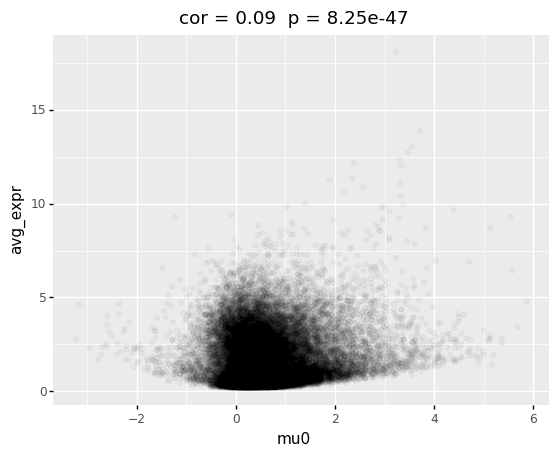

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__avg_expr.pdf


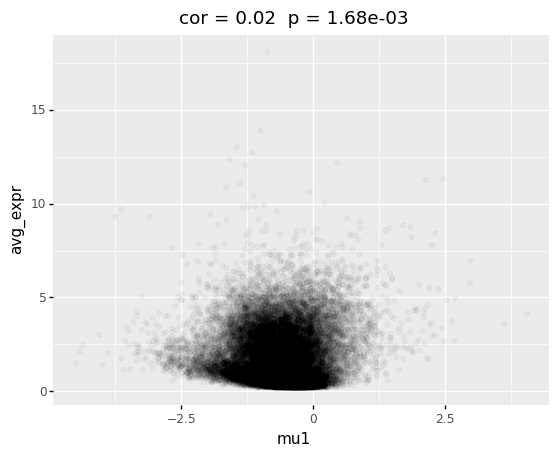

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__avg_expr.pdf


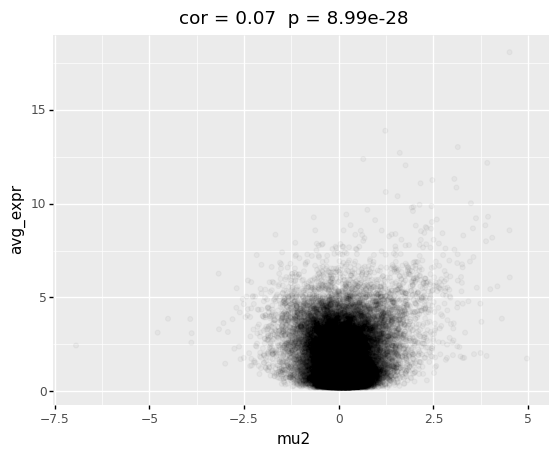

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__avg_expr.pdf


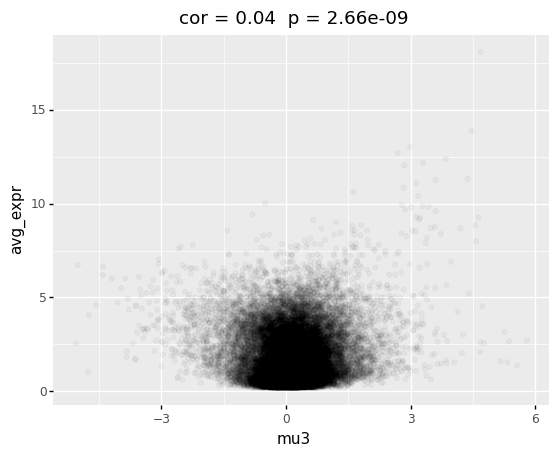

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__avg_expr.pdf


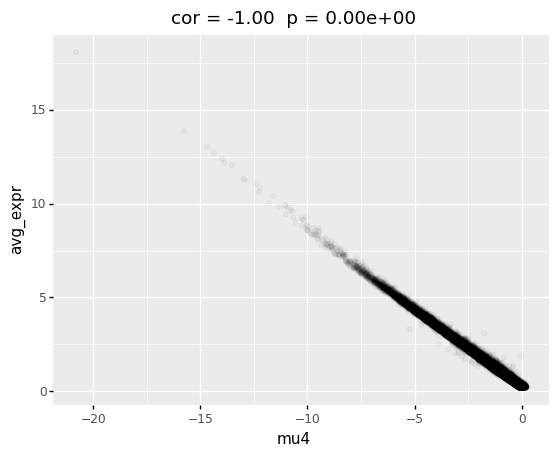

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__avg_expr.pdf


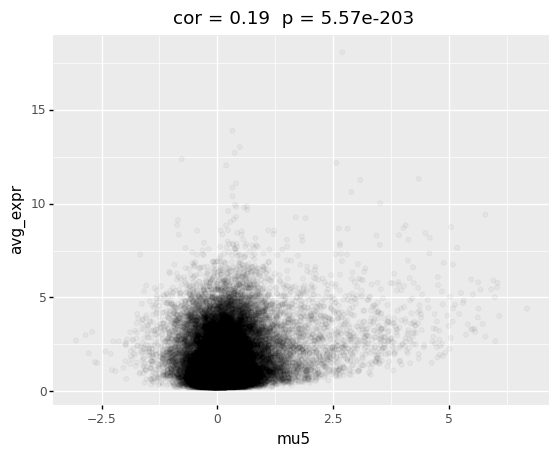

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__avg_expr.pdf


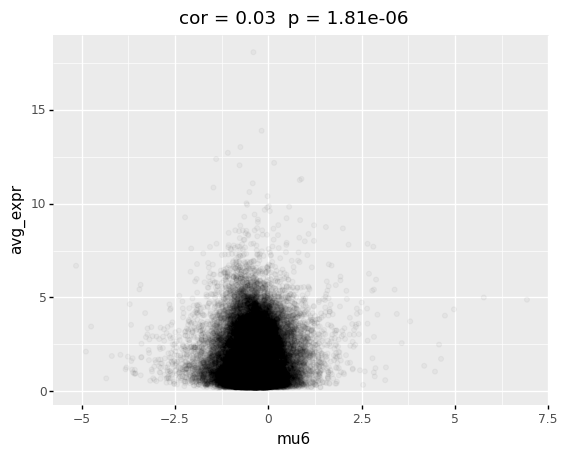

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__avg_expr.pdf


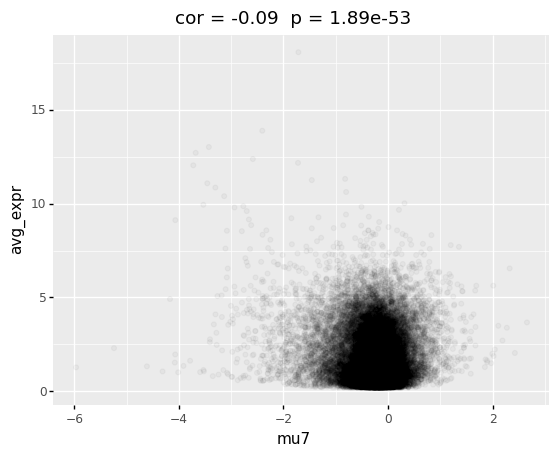

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__avg_expr.pdf


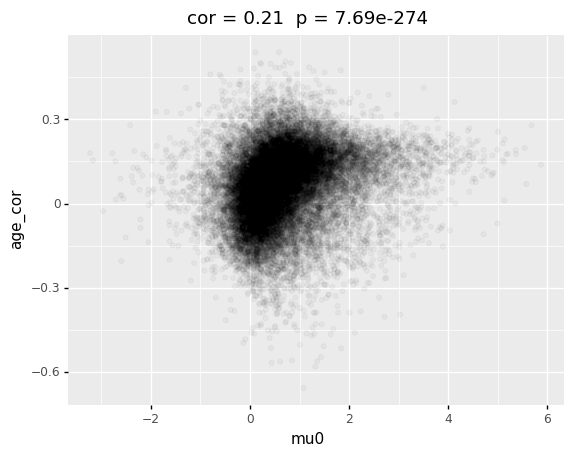

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__age_cor.pdf


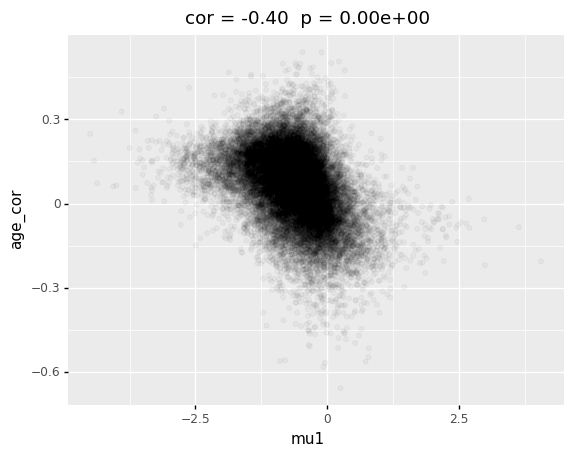

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__age_cor.pdf


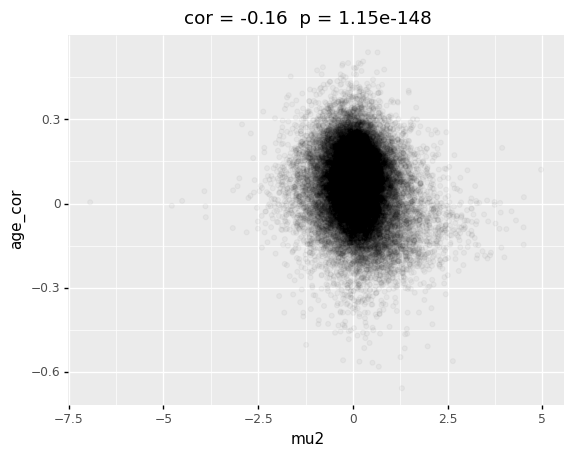

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__age_cor.pdf


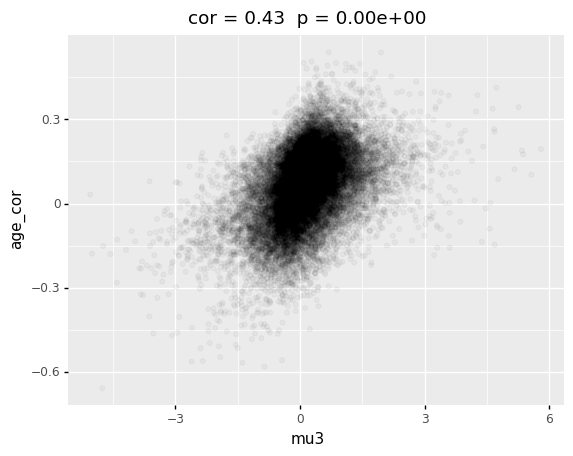

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__age_cor.pdf


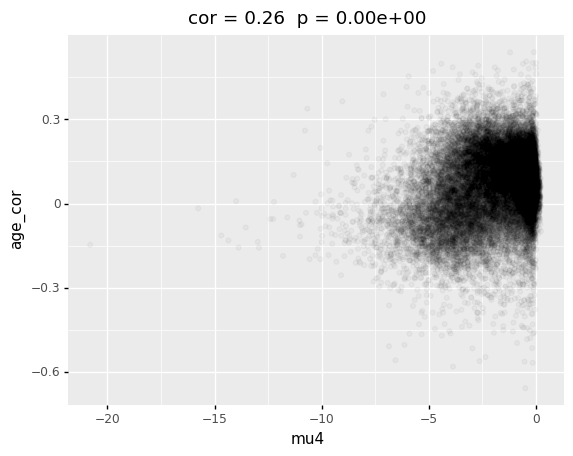

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__age_cor.pdf


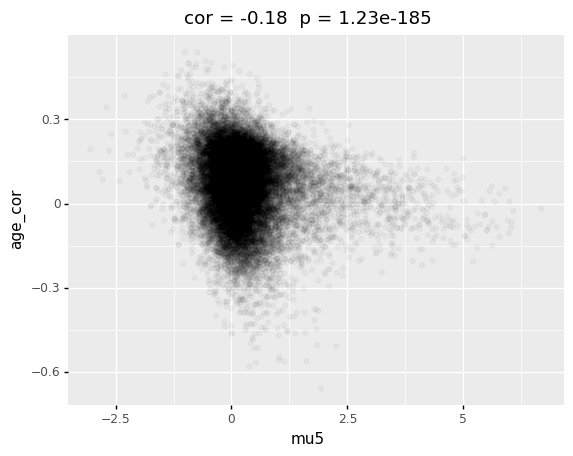

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__age_cor.pdf


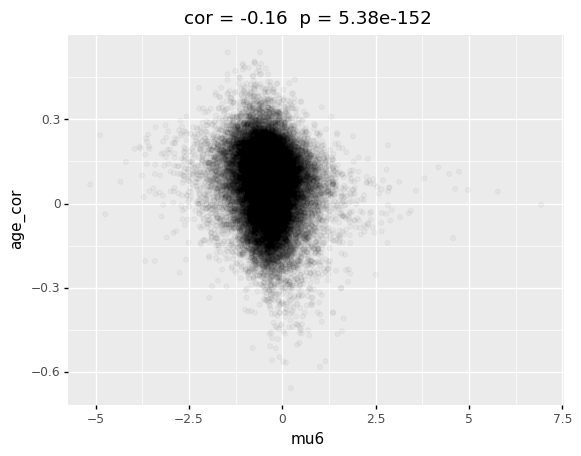

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__age_cor.pdf


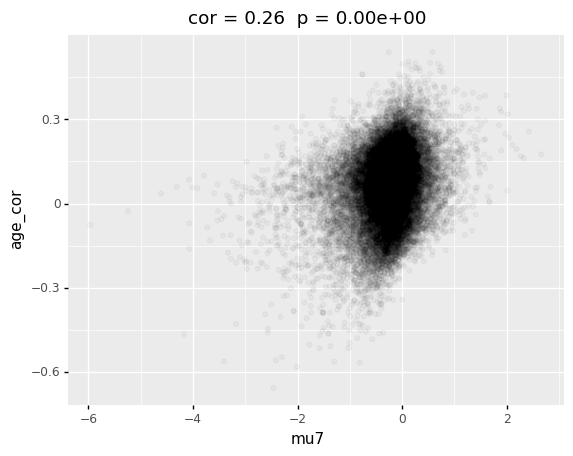

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__age_cor.pdf


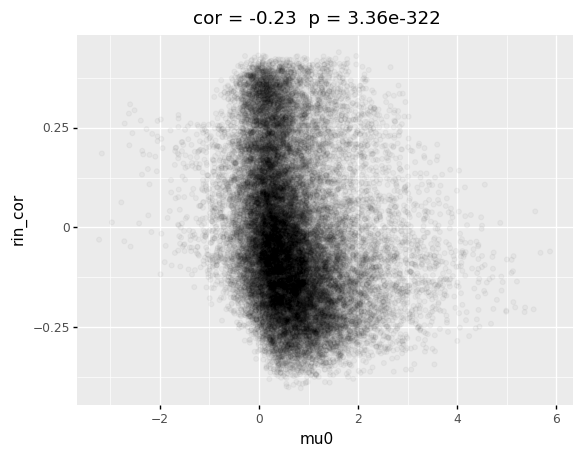

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__rin_cor.pdf


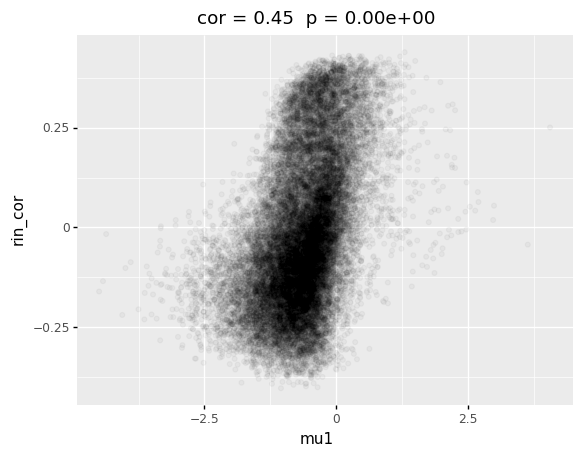

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__rin_cor.pdf


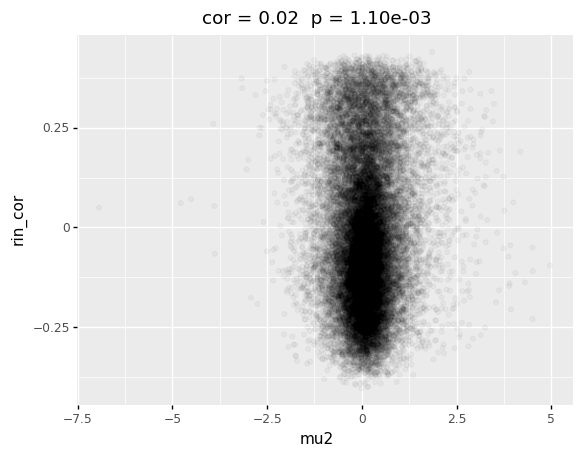

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__rin_cor.pdf


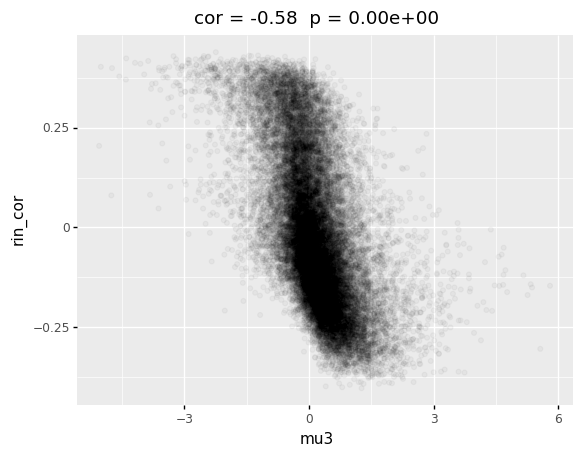

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__rin_cor.pdf


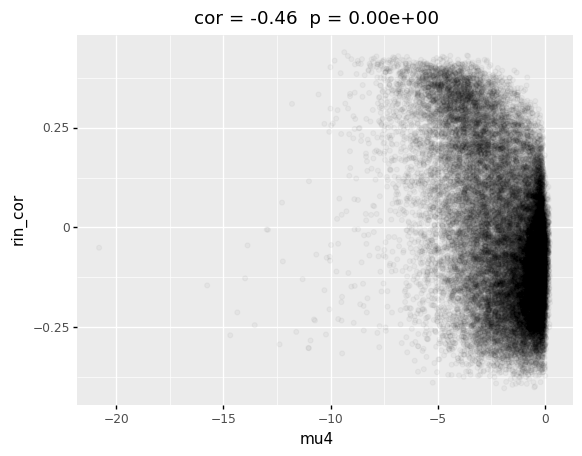

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__rin_cor.pdf


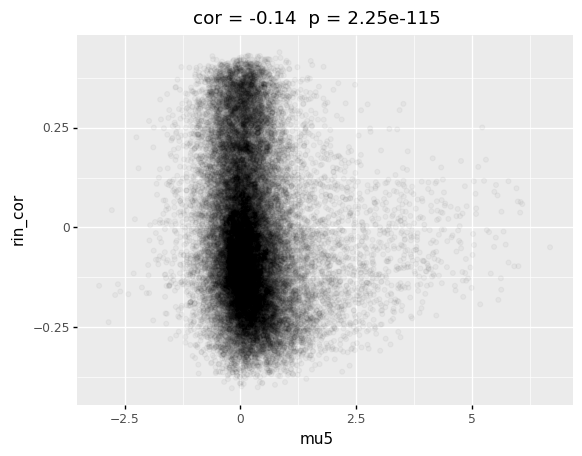

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__rin_cor.pdf


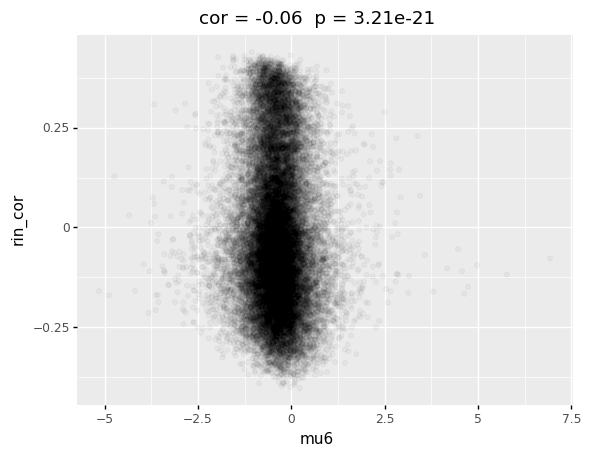

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__rin_cor.pdf


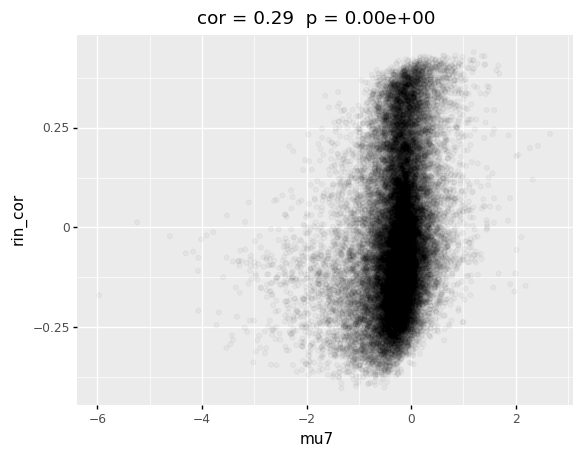

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__rin_cor.pdf


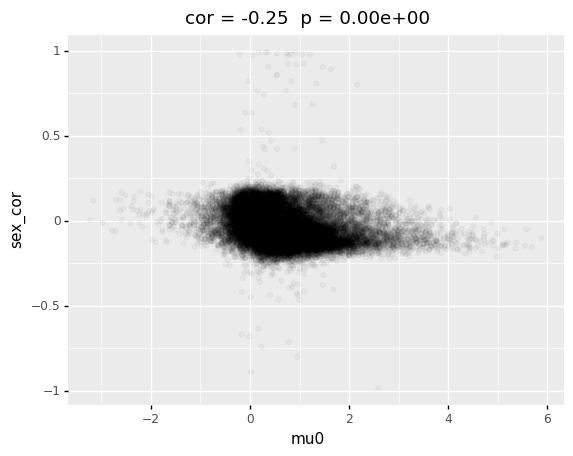

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__sex_cor.pdf


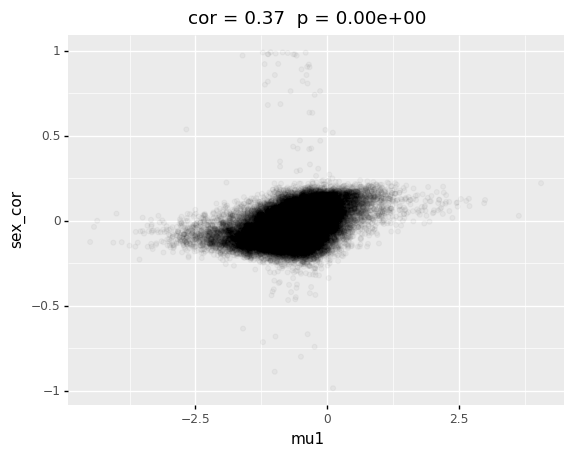

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__sex_cor.pdf


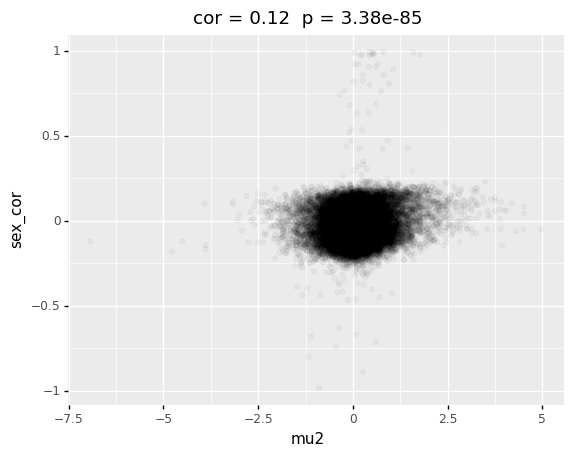

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__sex_cor.pdf


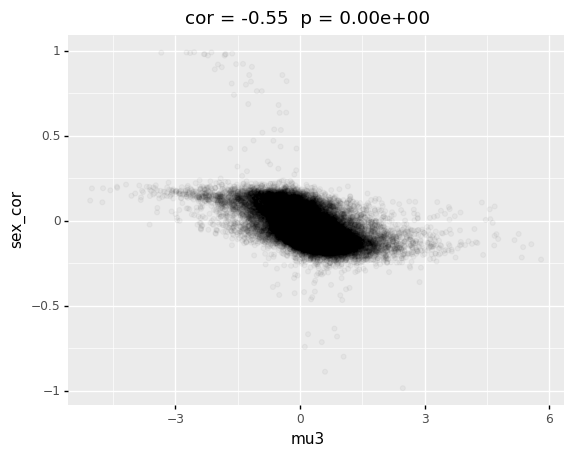

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__sex_cor.pdf


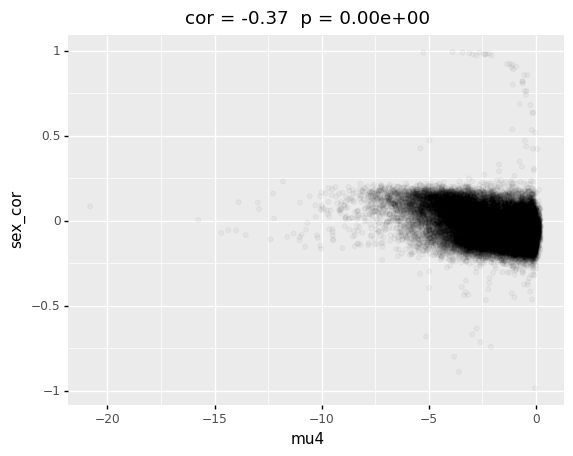

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__sex_cor.pdf


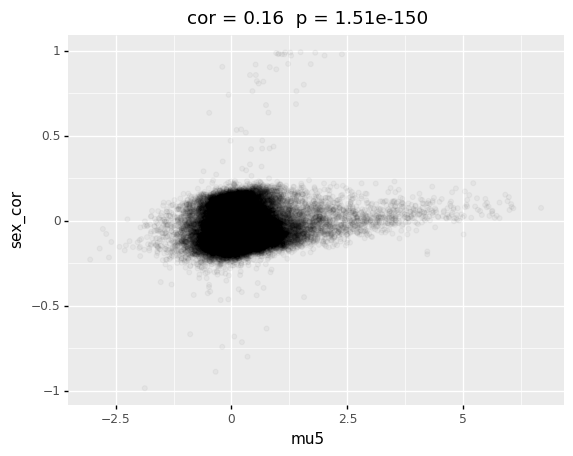

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__sex_cor.pdf


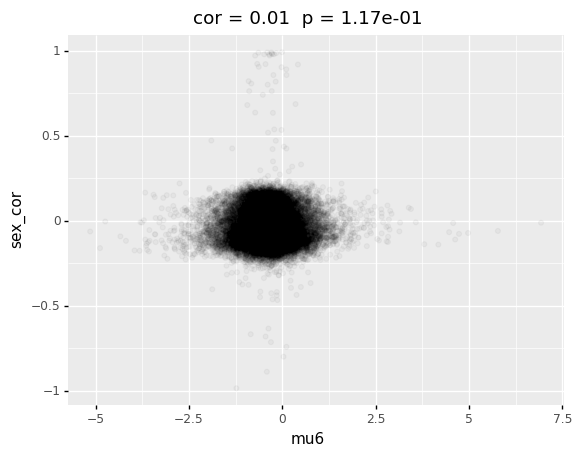

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__sex_cor.pdf


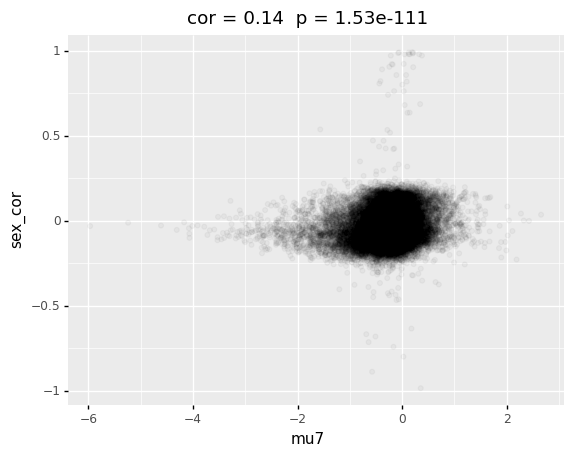

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__sex_cor.pdf


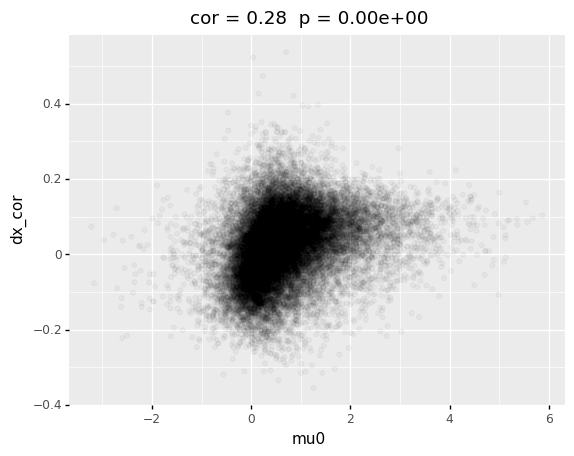

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__dx_cor.pdf


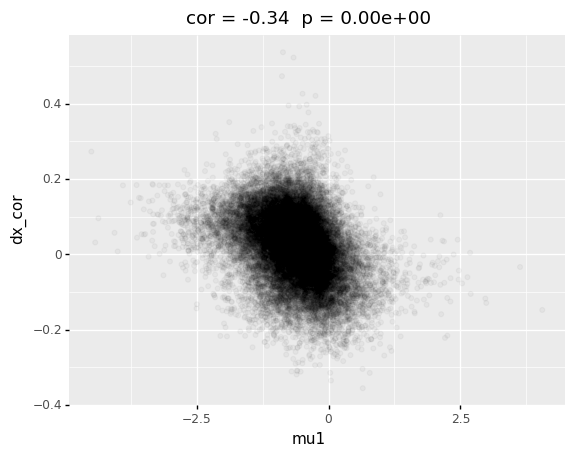

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__dx_cor.pdf


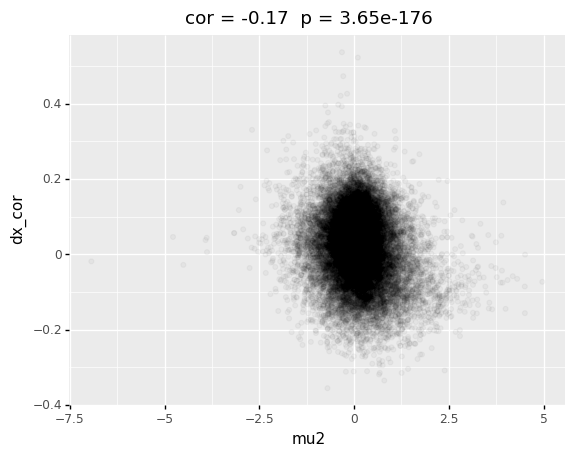

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__dx_cor.pdf


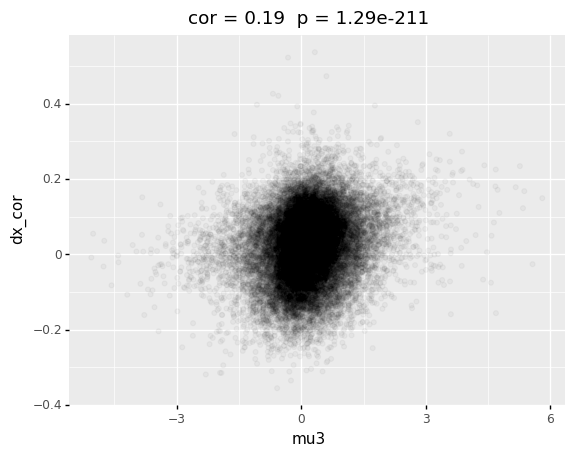

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__dx_cor.pdf


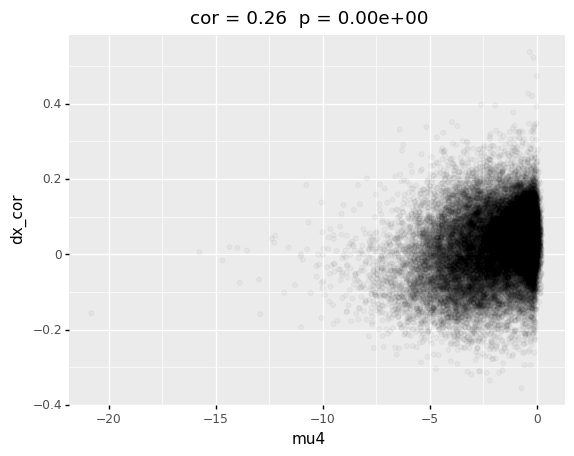

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__dx_cor.pdf


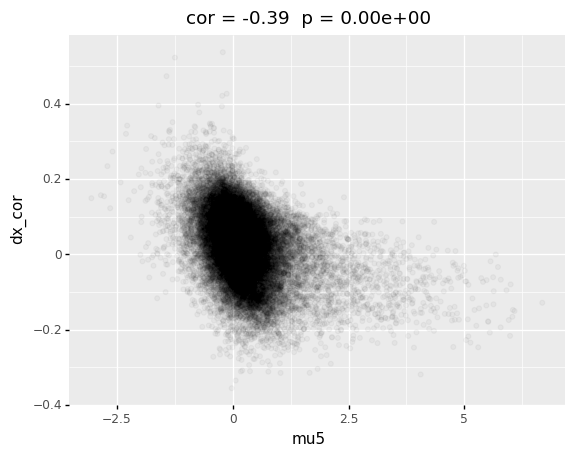

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__dx_cor.pdf


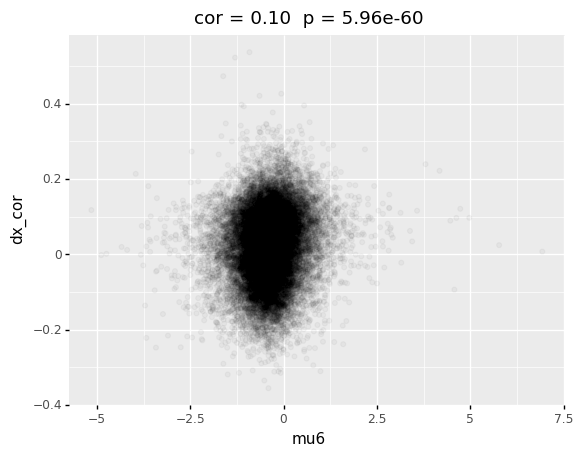

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__dx_cor.pdf


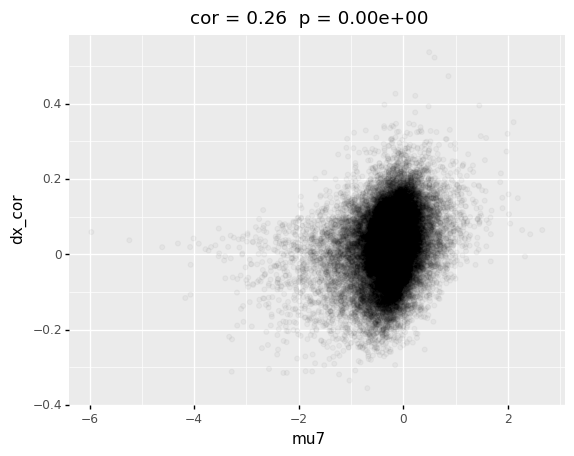

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__dx_cor.pdf


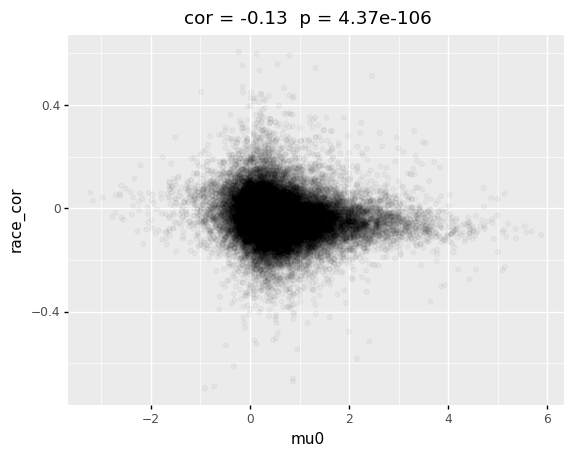

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__race_cor.pdf


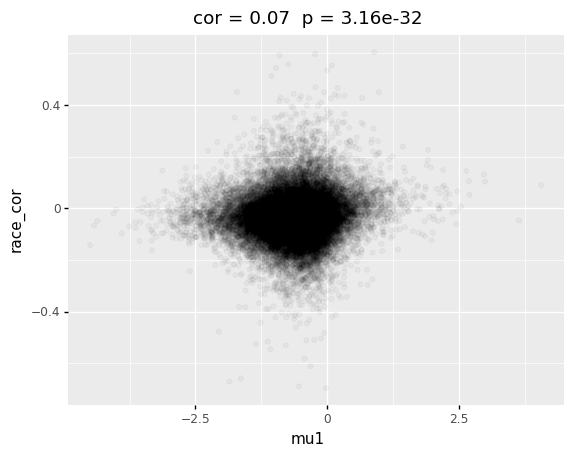

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__race_cor.pdf


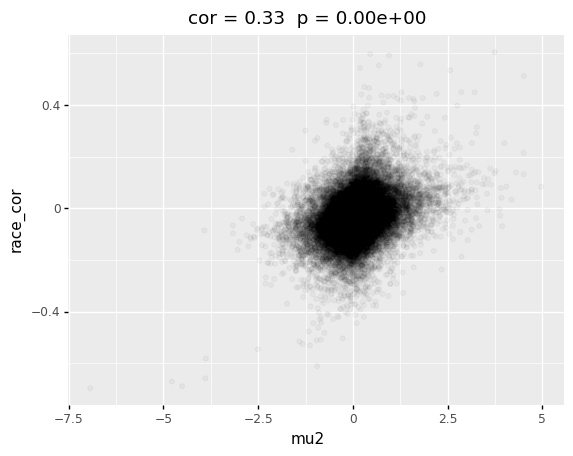

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__race_cor.pdf


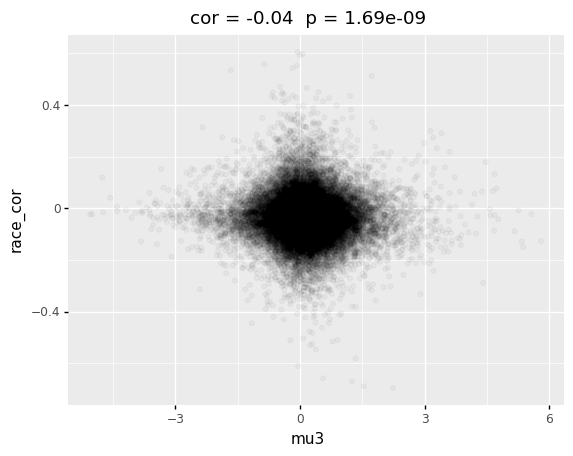

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__race_cor.pdf


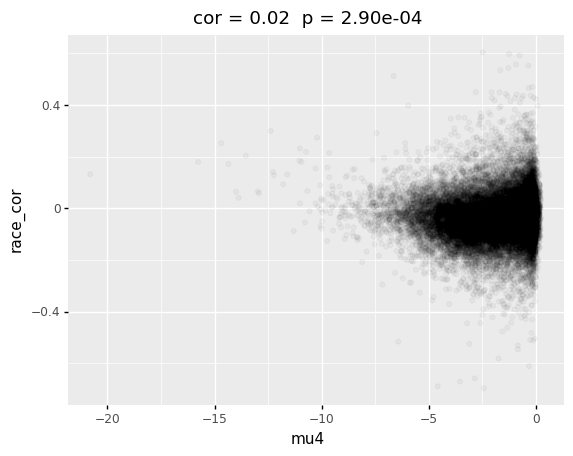

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__race_cor.pdf


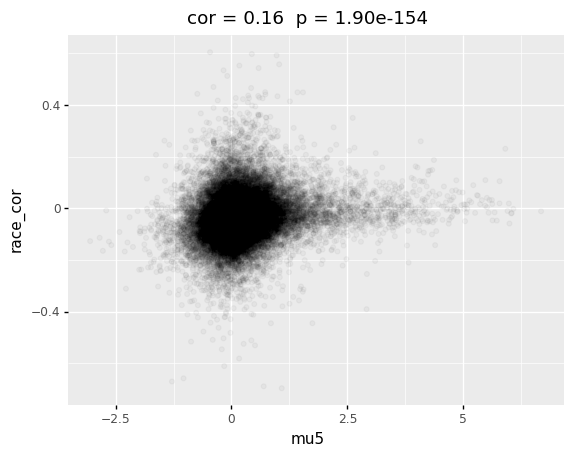

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__race_cor.pdf


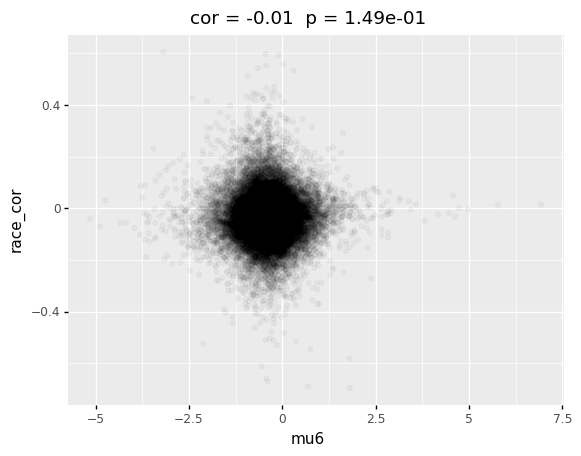

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__race_cor.pdf


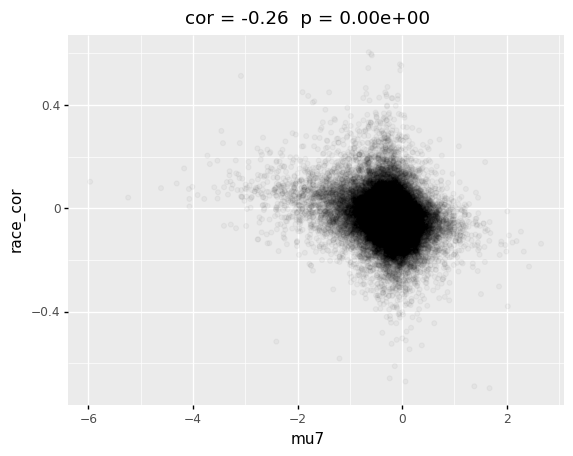

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__race_cor.pdf


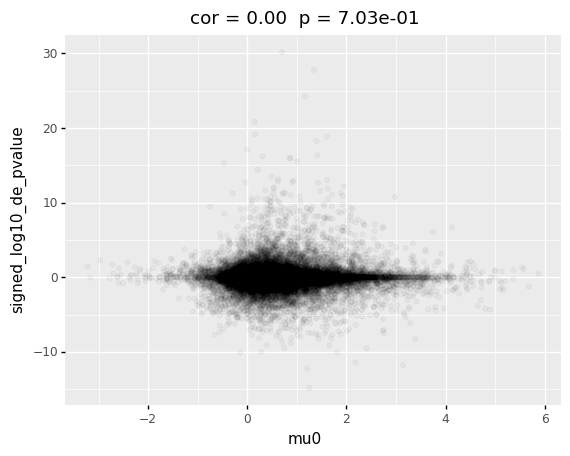

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu0__signed_log10_de_pvalue.pdf


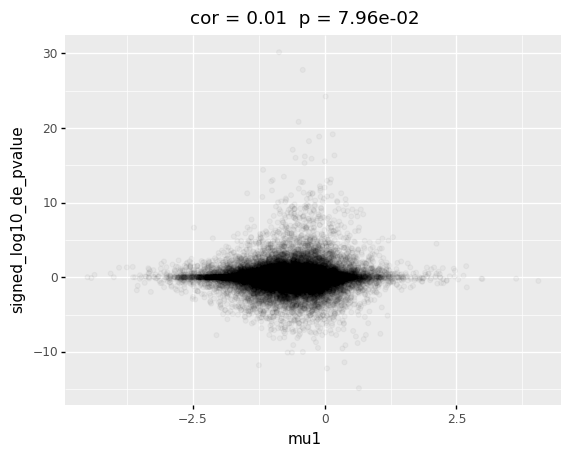

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu1__signed_log10_de_pvalue.pdf


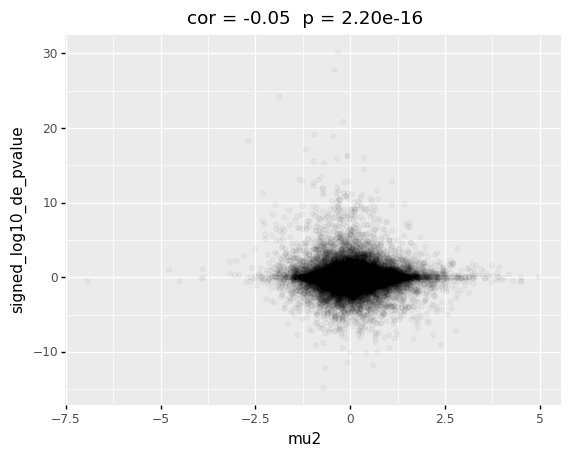

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu2__signed_log10_de_pvalue.pdf


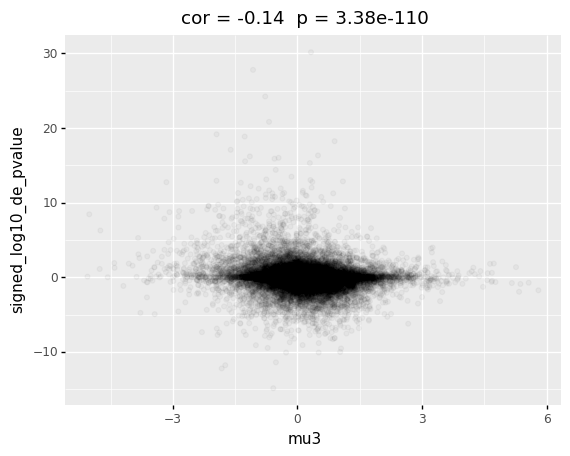

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu3__signed_log10_de_pvalue.pdf


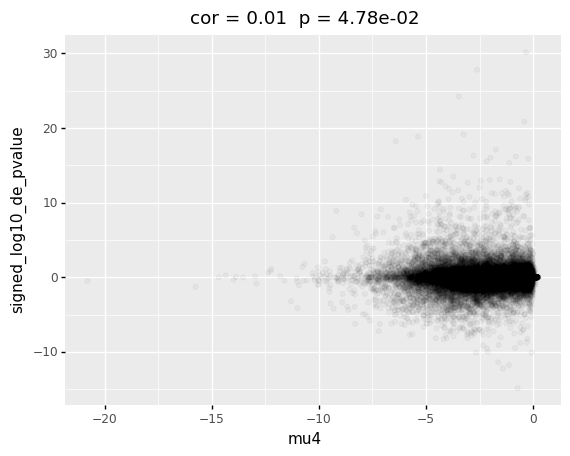

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu4__signed_log10_de_pvalue.pdf


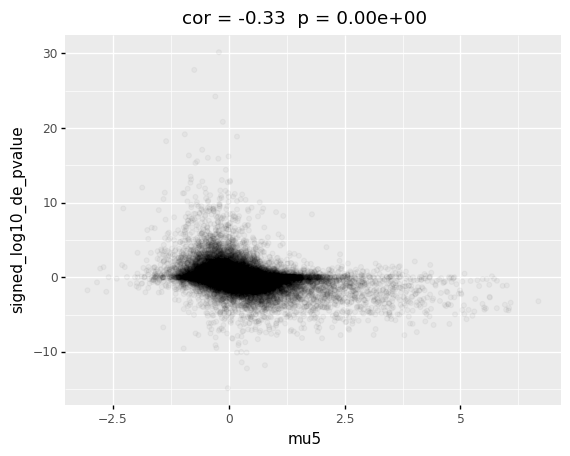

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu5__signed_log10_de_pvalue.pdf


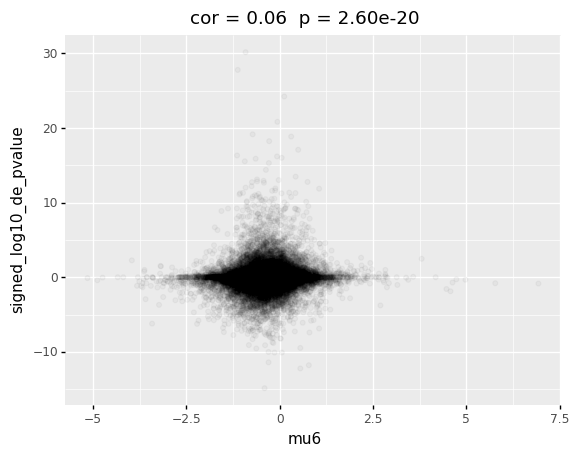

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu6__signed_log10_de_pvalue.pdf


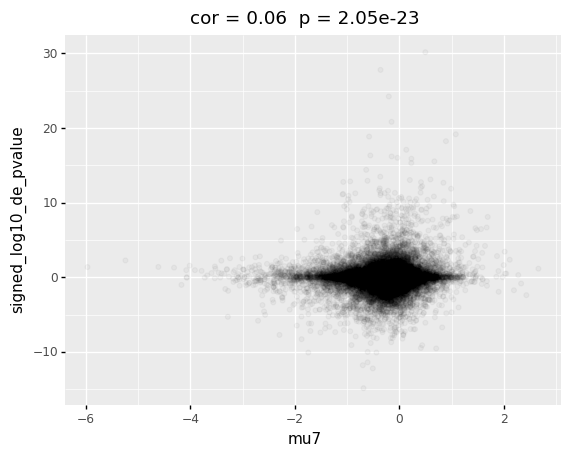

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: mu7__signed_log10_de_pvalue.pdf


In [23]:
for kk in df2.columns:
    for j in range(8):
        p = ggplot(edf, aes(y=kk, x='mu%d'%j)) + geom_point(alpha=0.03) \
        + ggtitle("cor = %.2f  p = %.2e" % (pearsonr(edf[kk], edf['mu%d'%j])))
        print(p)
        p.save('mu%d__%s.pdf' % (j, kk))
    

In [24]:
pwd

'/ceph/projects/v4_phase3_paper/analysis/gnvae/disvae/model/embedding/correlations/_h'